<a href="https://colab.research.google.com/github/Murcha1990/ML_Course_PT/blob/main/Lecture1_MLBasics/PT_Practice1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение в машинное обучение. Задача регрессии


Цели ноутбука:

* Научиться обучать линейную регрессию и оценивать ее качество

Будем обучать регрессию для прогнозирования возраста крабов по их различным характеристикам!

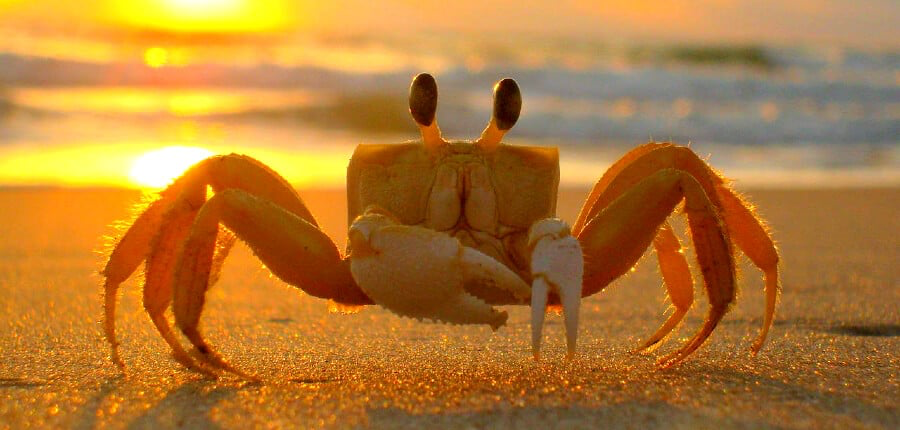

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/all_datasets/main/CrabeAge.csv")

Описание данных (из оригинального источника):

* Sex	(object) - gender of the crab (Male, Female, Intermediate)

* Length (float) - length of the crab, in foot

* Diameter (float) - diameter of the crab, in foot

* Height (float) - height of the crab, in foot

* Weight (float) - weight of the crab, in ounces

* Shucked Weight (float) - weight without the shell, in ounces

* Viscera Weight (float) - deep abdominal organs weight, in ounces

* Shell Weight (float) - weight of the shell, in ounces

* Age	(int)	- age of the crab, in months

In [2]:
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [3]:
df.shape

(3893, 9)

Сформируем матрицу объект-признак `X` и вектор целевой переменной `y`.

In [4]:
X = df.drop(['Sex', 'Age'], axis=1) # матрица объект-признак
y = df['Age'] # target

X.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970


Разобъем данные на обучающую и тестовую части.

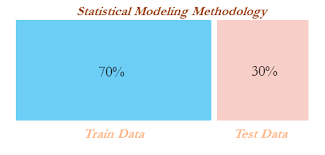

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((2919, 7), (974, 7))

### Обучим линейную регрессию

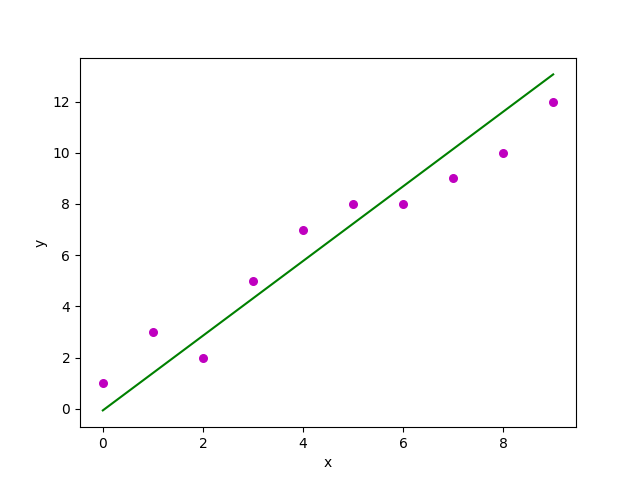

Линейная регрессия прогнозирует целевую переменную по формуле

$$a(x) = w_0 + w_1x_1 + w_2x_2 + ... +w_dx_d,$$
где

* $x_1, x_2, ..., x_d$ - признаки объекта

* $w_0, w_1, ..., w_d$ - веса модели (подбираются автоматически в процессе обучения)

* $a(x)$ - прогноз целевой переменной на объекте $x$.

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

Оценим качество прогноза

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

pred = model.predict(X_test)

pred[:10]

array([ 6.61836162,  8.04018451,  8.89889775,  9.68620033,  6.65055555,
       15.85130477, 10.82970586, 12.8720049 ,  9.68616597,  7.48446699])

In [8]:
y_test[:10].values

array([ 6,  8, 11,  9,  6, 16, 13, 13,  8,  9])

In [9]:
mean_squared_error(y_test, pred) ** 0.5 # RMSE

2.1996910496301276

<Axes: >

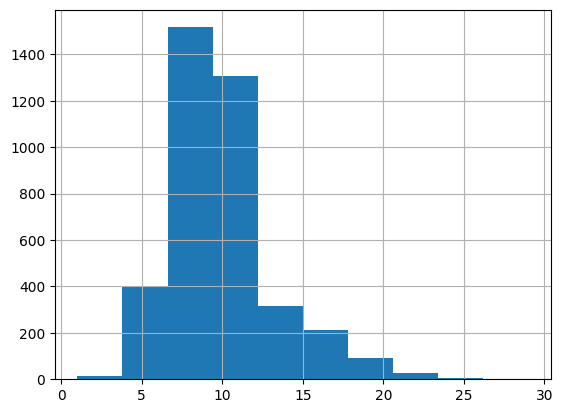

In [10]:
df['Age'].hist()

## Метрики качества в задаче регрессии

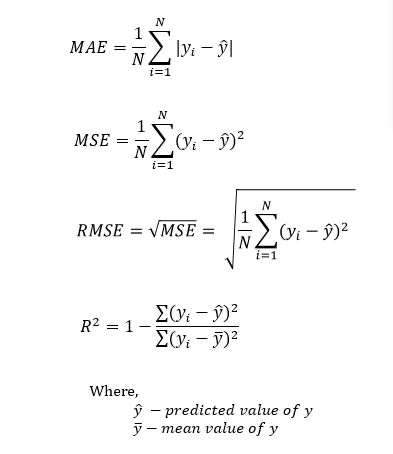

In [11]:
r2_score(y_test, pred)

0.5118114889219193

Есть ли переобучение?

In [12]:
pred_train = model.predict(X_train)

r2_score(y_train, pred_train)

0.5286915136349506

Переобучения нет. Будем пытаться улучшить качество модели.

### Добавление категориального признака

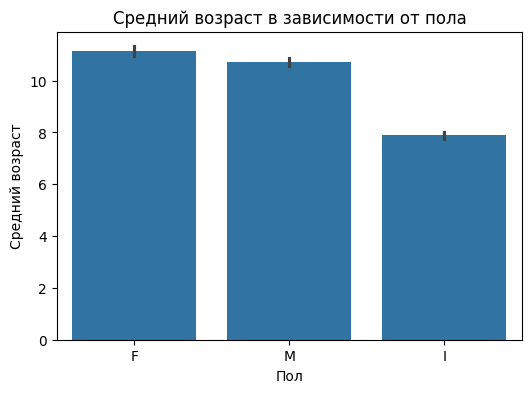

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Age', data=df)

plt.title('Средний возраст в зависимости от пола')
plt.xlabel('Пол')
plt.ylabel('Средний возраст')

plt.show()

One-Hot кодирование

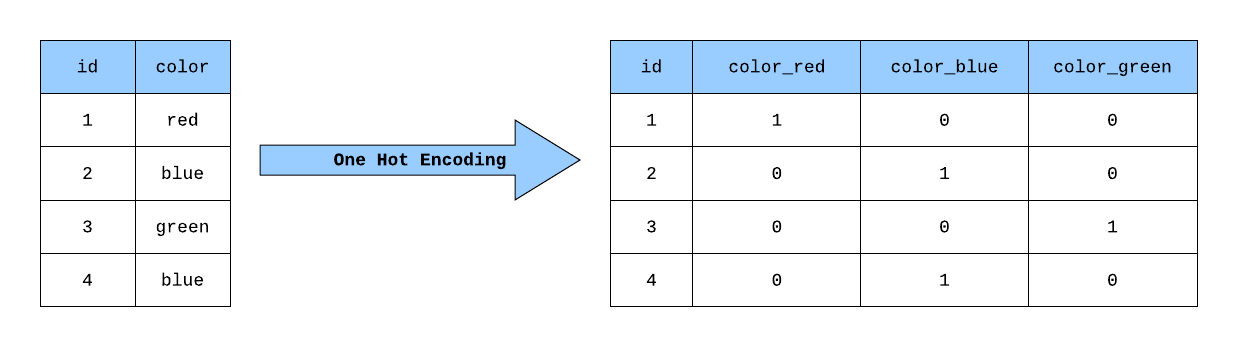

In [14]:
df_encoded = pd.get_dummies(df, columns=['Sex'], drop_first = True, dtype = int)

df_encoded.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_I,Sex_M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,0,0
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0,1
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,1,0
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,0,0
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,1,0


In [15]:
X_enc = df_encoded.drop(['Age'], axis=1)
y_enc = df_encoded['Age']

X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X_enc, y_enc, test_size=0.25, random_state=42)

In [16]:
model.fit(X_train_enc, y_train_enc)

pred_enc = model.predict(X_test_enc)

In [17]:
r2_score(y_test_enc, pred_enc)

0.5192632383282014

Качество немного возросло.

## Обработка выбросов

In [18]:
df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


Подозрительные столбцы: Height, Weight, Shell Weight (и может быть другие)

In [19]:
np.percentile(df['Height'], 99), df['Height'].max()

(np.float64(0.55), 2.825)

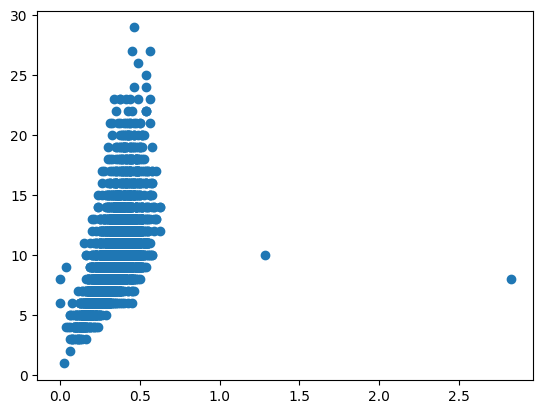

In [20]:
from matplotlib import pyplot as plt

plt.scatter(df['Height'], df['Age'])

In [27]:
np.percentile(df['Weight'], 99), df['Weight'].max()

(np.float64(60.717825119999986), 80.10151225)

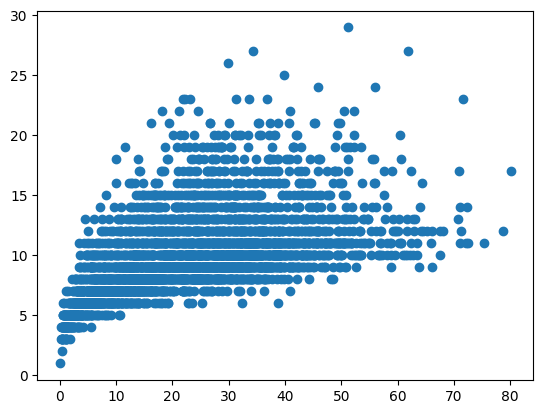

In [28]:
plt.scatter(df['Weight'], df['Age'])

In [29]:
np.percentile(df['Shell Weight'], 99), df['Shell Weight'].max()

(np.float64(17.57669), 28.4912475)

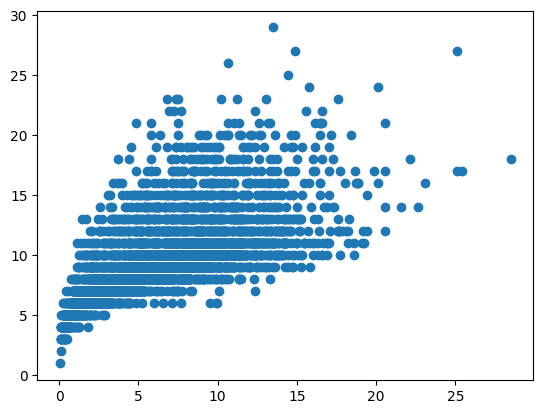

In [30]:
plt.scatter(df['Shell Weight'], df['Age'])

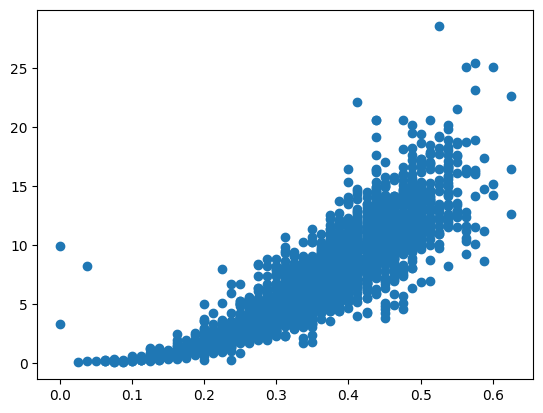

In [31]:
df_clean = df.copy()
df_clean = df_clean[df_clean['Height'] < 1]

plt.scatter(df_clean['Height'], df_clean['Shell Weight'])

Оставим только объекты с Height < 1.

In [32]:
df_encoded = df_encoded[df_encoded['Height'] < 1]

X_enc = df_encoded.drop(['Age'], axis=1)
y_enc = df_encoded['Age']

X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X_enc, y_enc, test_size=0.25, random_state=42)

In [33]:
model.fit(X_train_enc, y_train_enc)

pred_enc_clean = model.predict(X_test_enc)

In [34]:
r2_score(y_test_enc, pred_enc_clean)

0.5360536896988822